In [1]:
#import various libaries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Problem 1 - Data Prep

In [2]:
#read the data, map Seasons to numbers, split the data into X and y, split X and y into train/test
df = pd.read_csv('bike_data.csv', delimiter=',', encoding='ISO-8859-1', usecols=[1,2,3,4,5,6,7,8,9,10,11])
df['Seasons'] = df['Seasons'].replace('Winter','1')
df['Seasons'] = df['Seasons'].replace('Spring','2')
df['Seasons'] = df['Seasons'].replace('Summer','3')
df['Seasons'] = df['Seasons'].replace('Autumn','4')
X = df.iloc[:,1:]
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

# Problem 2 - Linear Regression

In [3]:
#10x Cross Val
pipe = make_pipeline(sklearn.preprocessing.Normalizer(), LinearRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=10)
print(np.mean(scores))


0.24669943398116795


In [4]:
#Train/Test results without CV
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.25063362300028913
0.2560204529115936


# Problem 3 - Ridge/Lasso

In [5]:
#Ridge
pipe_ridge =  make_pipeline(sklearn.preprocessing.Normalizer(), Ridge())
param_grid = {'ridge__alpha':np.logspace(-5, 3)}
grid_Ridge = GridSearchCV(pipe_ridge, param_grid,return_train_score = True, cv=10)
grid_Ridge.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_Ridge.best_score_))
print("best parameters: {}".format(grid_Ridge.best_params_))
print("test-set score: {:.3f}".format(grid_Ridge.score(X_test, y_test)))

best mean cross-validation score: 0.247
best parameters: {'ridge__alpha': 0.0019306977288832496}
test-set score: 0.254


In [6]:
#Lasso
pipe_lasso =  make_pipeline(sklearn.preprocessing.Normalizer(), Lasso())
param_grid = {'lasso__alpha':np.logspace(-5, 3)}
grid_Lasso = GridSearchCV(pipe_lasso, param_grid, return_train_score = True, cv=10)
grid_Lasso.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_Lasso.best_score_))
print("best parameters: {}".format(grid_Lasso.best_params_))
print("test-set score: {:.3f}".format(grid_Lasso.score(X_test, y_test)))

best mean cross-validation score: 0.247
best parameters: {'lasso__alpha': 0.00868511373751352}
test-set score: 0.253


# Problem 4 - Visualize Performance

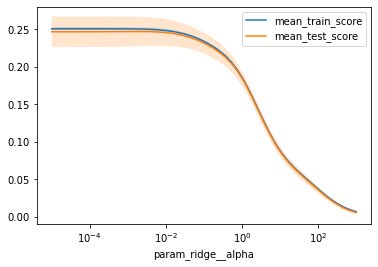

In [7]:
#store results of the gridsearch in a df, plot the data
results = pd.DataFrame(grid_Ridge.cv_results_)
results.plot('param_ridge__alpha', 'mean_train_score')
results.plot('param_ridge__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

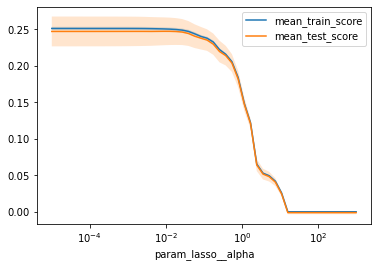

In [8]:
#store results of the gridsearch in a df, plot the data
results = pd.DataFrame(grid_Lasso.cv_results_)
results.plot('param_lasso__alpha', 'mean_train_score')
results.plot('param_lasso__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")


What can we conclude from this visualization? Which model and alpha gives the best
predictions?
Answer: The models are very similar in terms of performance. Ridge seems to perform slightly better (using {'ridge__alpha': 0.0019306977288832496})


How many coefficients are set to zero in the best Ridge/Lasso model respectively? 

Answer Ridge: Zero, refer to below;

Answer Lasso: Two, refer to below

In [9]:
#Ridge
coef_ridge = grid_Ridge.best_estimator_.named_steps['ridge'].coef_
print(coef_ridge)

[  9757.33887492  26036.73958644  -6332.3051866   -4566.78301933
  -7171.42407814  -5348.90527704  -7023.51443477 -24458.18627029
  33299.39810611   7958.05687546]


In [10]:
#Lasso
coef_lasso = grid_Lasso.best_estimator_.named_steps['lasso'].coef_
print(coef_lasso)

[  9641.35629869  24620.98987755  -6280.71365278     -0.
  -7058.95392732  -3847.35523448     -0.         -24275.4886861
  33550.54176273   4305.38689455]


# Problem 5 - Visualize the coefficients

Text(0, 0.5, 'coefficient')

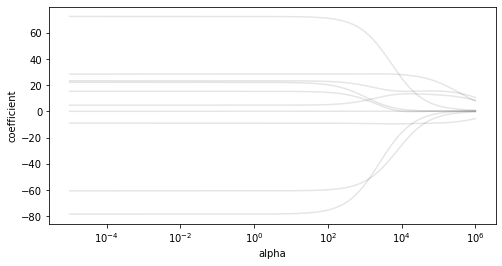

In [11]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750470870.759605, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749726243.4663754, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748880104.1205866, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487457327.5931596, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448351982.9077657, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403419650.226538, tolerance: 291396.91912704054
  model = cd_fast.enet_coordinate_descent(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

Text(0, 0.5, 'coefficient')

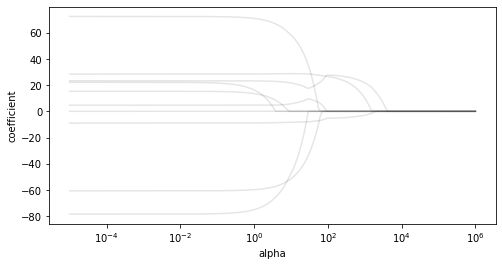

In [12]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

Interpret these plots and describe how their differences are related to the differences
between the Ridge and Lasso regression algorithms.

Answer: The coefficients of Lasso convergence to zero quicker when increasing alpha. This has due to the different form of regularization used (L1 for Lasso and L2 for Ridge). Because of the difference in approach Lasso sets some coefficients to zero completely, as evidenced in our answer to Q4.

# Problem 6 - Classification

In [13]:
#split the data in categories
y_cat = pd.cut(df['Rented Bike Count'], bins = [0,249.9999,800,1e6], labels = ['LOW', 'AVERAGE', 'BUSY' ], include_lowest=True)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=42, train_size=0.8)

pipe_KNN = make_pipeline(sklearn.preprocessing.Normalizer(), KNeighborsClassifier(n_neighbors=10))
pipe_KNN.fit(X_train, y_train)
print(pipe_KNN.score(X_test, y_test))

0.716324200913242


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=42, train_size=0.8)

logreg = LogisticRegression()
pipe_logreg = make_pipeline(sklearn.preprocessing.Normalizer(), logreg)
pipe_logreg.fit(X_train, y_train)
print(pipe_logreg.score(X_test, y_test))

0.476027397260274


KNN outperforms the Logistic Regression, because the latter is better suited for binary classification.